In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [8]:
cancer = pd.read_csv('breast-cancer.csv')
display(cancer)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
1134,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
1135,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
1136,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
X = cancer.drop('diagnosis', axis=1)  # Features
y_label = cancer['diagnosis']

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_label, train_size=0.7, stratify=y_label, random_state=0)

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#n_estimators = 10 is the default
#max_samples = 0.8 means that each bootstrap sample will be 80% of the size of your training set
#max_features = 0.5 means that each bootstrap sample will choose only 50% of your available features for each base classifier

parameters = {'n_neighbors':[1, 5, 7, 11]} #set parameters for GridSearch
knn = KNeighborsClassifier() #create your SVM object
GSKNN = GridSearchCV(knn, parameters)
GSKNN.fit(X_train, y_train)
print(GSKNN.best_estimator_) 

parameters2 = {'n_estimators':[5,10,25],'max_samples':[.6,.7,.8,.9],'max_features':[.25,.5,.75]}
BC = BaggingClassifier(estimator = GSKNN, oob_score=True) 
BCGS = GridSearchCV(BC, parameters2)
BCGS.fit(X_train, y_train)
y_pred =BCGS.predict(X_test)
print(BCGS.best_params_) 

KNeighborsClassifier(n_neighbors=11)
{'max_features': 0.75, 'max_samples': 0.6, 'n_estimators': 10}


0.9824120603015075 OOB
0.9883040935672515 Accuracy
0.9882644245021156 F1


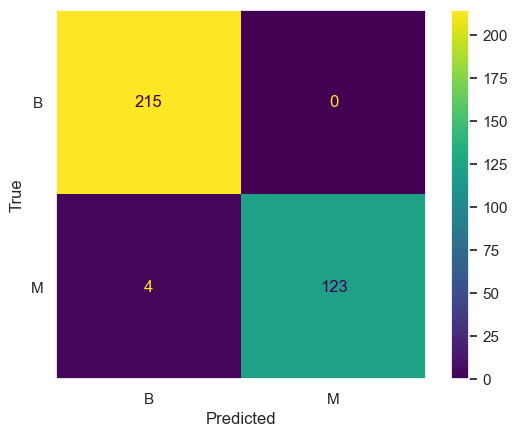

In [11]:
BC = BaggingClassifier(estimator = GSKNN, n_estimators = 25, max_samples = 0.7, max_features = 0.25, oob_score=True)
BC.fit(X_train, y_train)
y_pred =BC.predict(X_test)

print(BC.oob_score_, "OOB")
print(accuracy_score(y_test,y_pred),"Accuracy")
print(f1_score(y_test, y_pred, average="weighted"),"F1")
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

In [12]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[1, 5, 7, 11]} #set parameters for GridSearch
DT =  DecisionTreeClassifier() #create your SVM object
GSDT = GridSearchCV(DT, parameters)
GSDT.fit(X_train, y_train)
print(GSDT.best_params_) 


parameters2 = {'n_estimators':[5,10,25],'max_samples':[.6,.7,.8,.9],'max_features':[.25,.5,.75]}
BC2 = BaggingClassifier(estimator = GSDT, oob_score=True) 
BC2GS = GridSearchCV(BC2, parameters2)
BC2GS.fit(X_train, y_train)
y_pred =BC2GS.predict(X_test)
print(BC2GS.best_params_) 

{'max_depth': 7}
{'max_features': 0.5, 'max_samples': 0.8, 'n_estimators': 25}


0.9434673366834171 OOB
0.9678362573099415 Accuracy
0.9679109960480927 F1


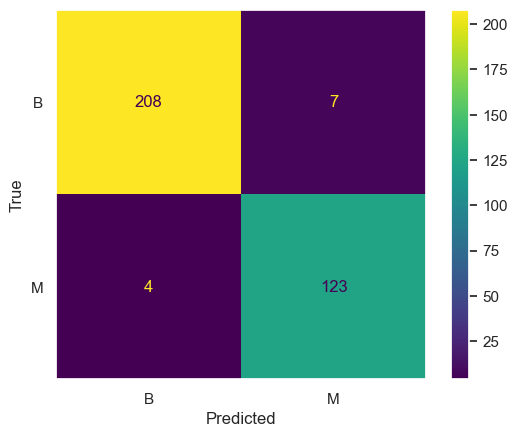

In [13]:
BC2 = BaggingClassifier(estimator = GSDT, n_estimators = 5, max_samples = 0.9, max_features = 0.5, oob_score=True) #Note: the default classifier is DecisionTreeClassifier
BC2.fit(X_train, y_train)
y_pred =BC2.predict(X_test)


print(BC2.oob_score_, "OOB")
print(accuracy_score(y_test,y_pred),"Accuracy")
print(f1_score(y_test, y_pred, average="weighted"),"F1")
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

In [14]:
parameters = {'C':[1, 3, 5, 7],'kernel':('linear', 'rbf', 'poly')}#set parameters for GridSearch
svc =  SVC() #create your SVM object
GSSVC = GridSearchCV(svc, parameters)
GSSVC.fit(X_train, y_train)
print(GSSVC.best_params_)

parameters2 = {'n_estimators':[5,10,25],'max_samples':[.6,.7,.8,.9],'max_features':[.25,.5,.75]}
BC3 = BaggingClassifier(estimator = GSSVC, oob_score=True) 
BC3GS = GridSearchCV(BC3, parameters2)
BC3GS.fit(X_train, y_train)
y_pred =BC3GS.predict(X_test)
print(BC3GS.best_params_) 

{'C': 3, 'kernel': 'rbf'}
{'max_features': 0.75, 'max_samples': 0.8, 'n_estimators': 5}


0.9798994974874372 OOB
0.9766081871345029 Accuracy
0.9764861744971088 F1


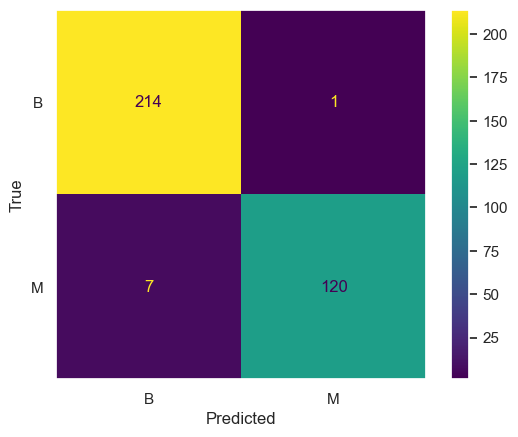

In [15]:
BC3 = BaggingClassifier(estimator = GSSVC, n_estimators = 25, max_samples = 0.6, max_features = 0.75, oob_score=True) #Note: the default classifier is DecisionTreeClassifier
BC3.fit(X_train, y_train)
y_pred =BC3.predict(X_test)

print(BC3.oob_score_, "OOB")
print(accuracy_score(y_test,y_pred),"Accuracy")
print(f1_score(y_test, y_pred, average="weighted"),"F1")
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

In [16]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB() #create your SVM object
GNB.fit(X_train, y_train)


parameters2 = {'n_estimators':[5,10,25],'max_samples':[.6,.7,.8,.9],'max_features':[.25,.5,.75]}
BC4 = BaggingClassifier(estimator = GNB, oob_score=True) 
BC4GS = GridSearchCV(BC4, parameters2)
BC4GS.fit(X_train, y_train)
y_pred =BC4GS.predict(X_test)
print(BC4GS.best_params_) 

{'max_features': 0.75, 'max_samples': 0.9, 'n_estimators': 5}


0.9522613065326633 OOB
0.9239766081871345 Accuracy
0.9238509081345339 F1


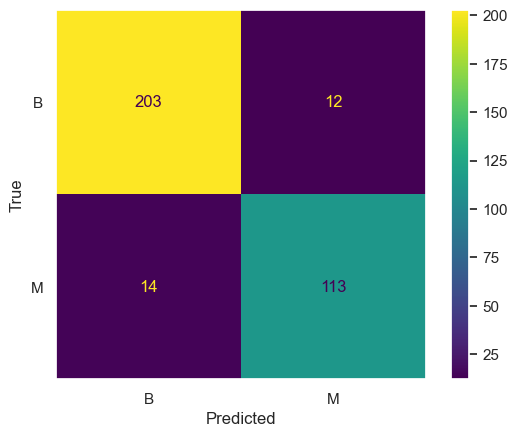

In [17]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
BC4 = BaggingClassifier(estimator = GNB, n_estimators = 25, max_samples = 0.7, max_features = 0.25, oob_score=True) #Note: the default classifier is DecisionTreeClassifier
BC4.fit(X_train, y_train)
y_pred =BC4.predict(X_test)


print(BC4.oob_score_, "OOB")
print(accuracy_score(y_test,y_pred),"Accuracy")
print(f1_score(y_test, y_pred, average="weighted"),"F1")
cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

Voting Classifier

{'C': 9, 'kernel': 'rbf'}
0.9824561403508771
0.9823966367531732


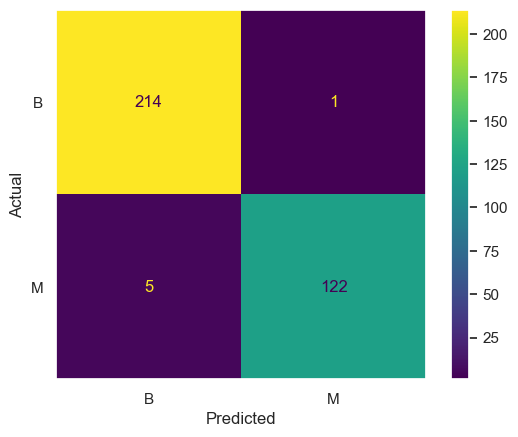

In [18]:
parameters = {'C':[1, 3, 5,7,9,11],'kernel':('linear', 'rbf', 'poly')} #set parameters for GridSearch
svc = SVC(probability=True) #create your SVM object
clf1 = GridSearchCV(svc, parameters, n_jobs=-1) #create your GridSearch object (which will use your SVM object)
clf1.fit(X_train, y_train) #Fit the GridSearch object
print(clf1.best_params_) 
y_pred = clf1.predict(X_test) #Generate a prediction using the model found by GridSearch

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
cmd.ax_.grid(False)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))


KNeighborsClassifier(n_neighbors=13)
0.9649122807017544
0.9646621844733227


KNeighborsClassifier(n_neighbors=13)

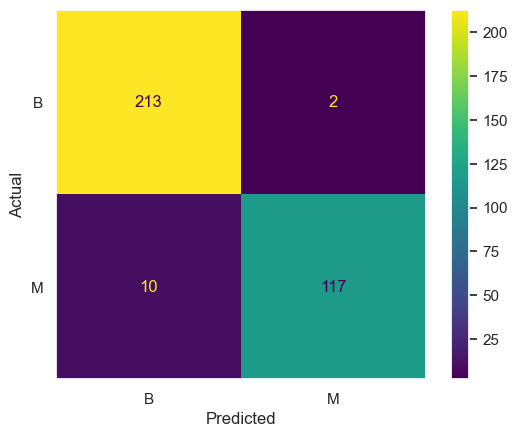

In [19]:
parameters = {'n_neighbors':[1, 5, 7, 11,13,15]} #set parameters for GridSearch
knn = KNeighborsClassifier() #create your SVM object
clf2 = GridSearchCV(knn, parameters) #create your GridSearch object (which will use your SVM object)
clf2.fit(X_train, y_train) #Fit the GridSearch object
print(clf2.best_estimator_) 
y_pred = clf2.predict(X_test) #Generate a prediction using the model found by GridSearch

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
cmd.ax_.grid(False)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

clf2.best_estimator_

DecisionTreeClassifier(max_depth=11)
0.9649122807017544
0.9650195474492543


DecisionTreeClassifier(max_depth=11)

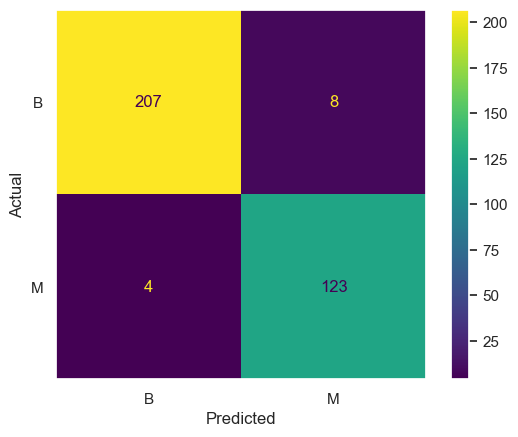

In [20]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':[1, 5, 7,11,13,15]} #set parameters for GridSearch
DT =  DecisionTreeClassifier() #create your SVM object
clf3 = GridSearchCV(DT, parameters) #create your GridSearch object (which will use your SVM object)
clf3.fit(X_train, y_train) #Fit the GridSearch object
print(clf3.best_estimator_) 
y_pred = clf3.predict(X_test) #Generate a prediction using the model found by GridSearch

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels= ['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
cmd.ax_.grid(False)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

clf3.best_estimator_

[[202  13]
 [ 14 113]]
0.9210526315789473
0.9209881953859825


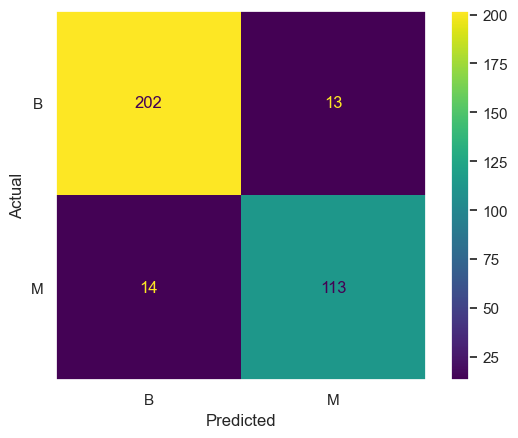

In [21]:
from sklearn.naive_bayes import GaussianNB
clf4 = GaussianNB()
clf4.fit(X_train, y_train) #Fit on the training set (need both data and labels)
y_pred =clf4.predict(X_test) #Predict on test set (no labels)

cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
cmd.ax_.grid(False)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

In [22]:
from sklearn.ensemble import VotingClassifier
eclfH = VotingClassifier(estimators=[('svc', clf1),('knn', clf2), ('dt', clf3), ('gnb', clf4)],
                        voting='hard')

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)
eclf = eclfH.fit(X_train, y_train)

print("Accuracy Score")
print(clf1.score(X_train, y_train), "SVC")
print(clf2.score(X_train, y_train),"KNN")
print(clf3.score(X_train, y_train),"DT")
print(clf4.score(X_train, y_train),"GNB")
print(eclfH.score(X_train, y_train),"Voting")

Accuracy Score
0.9899497487437185 SVC
0.9773869346733668 KNN
0.9987437185929648 DT
0.9510050251256281 GNB
0.9811557788944724 Voting


0.9736842105263158
0.9734706111194027


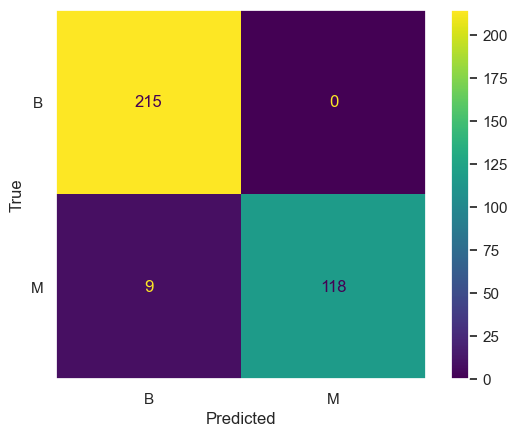

In [23]:
y_pred_ensembleH = eclfH.predict(X_test)
y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)
y_pred_3 = clf3.predict(X_test)
y_pred_4 = clf4.predict(X_test)

print(accuracy_score(y_test, y_pred_ensembleH))
print(f1_score(y_test, y_pred_ensembleH,average='weighted'))

cf_matrix = confusion_matrix(y_test, y_pred_ensembleH)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

In [24]:
eclfS = VotingClassifier(estimators=[('svc', clf1),('knn', clf2), ('dt', clf3), ('gnb', clf4)],
                        voting='soft',weights=[2, 1, 2, .5])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)
eclf = eclfS.fit(X_train, y_train)

print("Accuracy Score")
print(clf1.score(X_train, y_train), "SVC")
print(clf2.score(X_train, y_train),"KNN")
print(clf3.score(X_train, y_train),"DT")
print(clf4.score(X_train, y_train),"GNB")
print(eclfS.score(X_train, y_train),"Voting")
#Give higher weights to SVC and DT because they perfrom better in Hard classifier 

Accuracy Score
0.9899497487437185 SVC
0.9773869346733668 KNN
1.0 DT
0.9510050251256281 GNB
0.9949748743718593 Voting


0.9941520467836257
0.9941423775488103


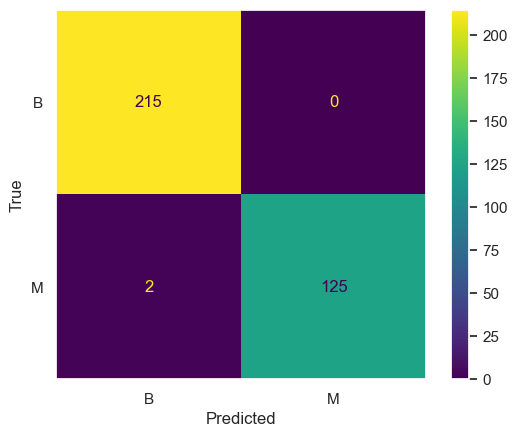

In [25]:
y_pred_ensembleS = eclfS.predict(X_test)
y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)
y_pred_3 = clf3.predict(X_test)
y_pred_4 = clf4.predict(X_test)

print(accuracy_score(y_test, y_pred_ensembleS))
print(f1_score(y_test, y_pred_ensembleS,average='weighted'))

cf_matrix = confusion_matrix(y_test, y_pred_ensembleS)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

In [28]:
X = cancer.drop('diagnosis', axis=1)  # Features
y_label = cancer['diagnosis']

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_label, train_size=0.7, stratify=y_label, random_state=0)

In [47]:
from sklearn.feature_selection import RFECV

param_grid = [{'estimator__C':[1, 3, 5,7,9,11]}]
estimator = SVC(kernel="linear")
selector = RFECV(estimator, step=1, cv=4)
clf = GridSearchCV(selector, param_grid, cv=7, scoring="balanced_accuracy")
clf.fit(X_train, y_train)
print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred))
clf.best_estimator_

0.9678362573099415


RFECV(cv=4, estimator=SVC(C=7, kernel='linear'))

In [48]:
X_train = pd.DataFrame(X_train)
feature_rankings = pd.DataFrame({'Feature': X_train.columns, 'Ranking': clf.best_estimator_.ranking_})

print(feature_rankings)

    Feature  Ranking
0         0        5
1         1        8
2         2        1
3         3        2
4         4       19
5         5        1
6         6        1
7         7        4
8         8       16
9         9       15
10       10        1
11       11       11
12       12        1
13       13        3
14       14       10
15       15        7
16       16        9
17       17       17
18       18       18
19       19       13
20       20        1
21       21        1
22       22        1
23       23        1
24       24        1
25       25       14
26       26        6
27       27        1
28       28        1
29       29       12


In [50]:
colHIV=pd.DataFrame(X.columns)
print(colHIV)
# perimeter_mean
#compactness_mean
#concavity_mean
#radius_se
#perimeter_se
#radius_worst
#texture_worst
#perimeter_worst
#area_worst
#smoothness_worst
#concave points_worst
#symmetry_worst

                          0
0               radius_mean
1              texture_mean
2            perimeter_mean
3                 area_mean
4           smoothness_mean
5          compactness_mean
6            concavity_mean
7       concave points_mean
8             symmetry_mean
9    fractal_dimension_mean
10                radius_se
11               texture_se
12             perimeter_se
13                  area_se
14            smoothness_se
15           compactness_se
16             concavity_se
17        concave points_se
18              symmetry_se
19     fractal_dimension_se
20             radius_worst
21            texture_worst
22          perimeter_worst
23               area_worst
24         smoothness_worst
25        compactness_worst
26          concavity_worst
27     concave points_worst
28           symmetry_worst
29  fractal_dimension_worst


In [60]:
# perimeter_mean
#compactness_mean
#concavity_mean
#radius_se
#perimeter_se
#radius_worst
#texture_worst
#perimeter_worst
#area_worst
#smoothness_worst
#concave points_worst
#symmetry_worst
selected_columns = [
    'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 
    'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
    'fractal_dimension_se', 'radius_worst', 'texture_worst'
]

# Create a new DataFrame ('cancer2') by selecting only the specified columns
cancer2 = cancer[selected_columns].copy()

X = cancer2.drop('diagnosis', axis=1)  # Features
y_label = cancer2['diagnosis']

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_label, train_size=0.7, stratify=y_label, random_state=0)

In [77]:
param_grid = [{'estimator__C':[1, 3, 5,7,9,11]}]
estimator = SVC(kernel="linear")
selector = RFECV(estimator, step=1, cv=4)
clf = GridSearchCV(selector, param_grid, cv=7, scoring="balanced_accuracy")
clf.fit(X_train, y_train)
print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred))
clf.best_estimator_

0.9210526315789473


RFECV(cv=4, estimator=SVC(C=7, kernel='linear'))

In [78]:
X_train = pd.DataFrame(X_train)
feature_rankings = pd.DataFrame({'Feature': X_train.columns, 'Ranking': clf.best_estimator_.ranking_})

print(feature_rankings)

   Feature  Ranking
0        0        4
1        1        5
2        2        1
3        3        1
4        4        6
5        5        3
6        6        1
7        7        2
8        8        1
9        9        1


In [79]:
colHIV=pd.DataFrame(X.columns)
print(colHIV)
#smoothness_mean
#area_se
#concavity_se
#radius_worst
#texture_worst

                      0
0           radius_mean
1          texture_mean
2       smoothness_mean
3               area_se
4         smoothness_se
5        compactness_se
6          concavity_se
7  fractal_dimension_se
8          radius_worst
9         texture_worst


In [81]:
selected_columns = ['smoothness_mean', 'area_se', 'concavity_se', 'radius_worst', 'texture_worst','diagnosis']

# Create a new DataFrame ('cancer2') by selecting only the specified columns
cancer2 = cancer[selected_columns].copy()

X = cancer2.drop('diagnosis', axis=1)  # Features
y_label = cancer2['diagnosis']

mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_label, train_size=0.7, stratify=y_label, random_state=0)

{'C': 5, 'kernel': 'poly'}
0.9502923976608187
0.9498889321144275


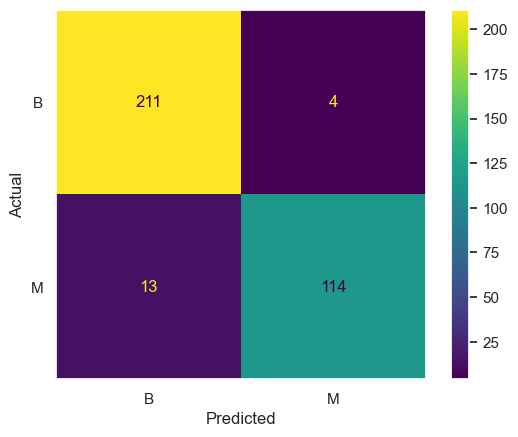

In [82]:
parameters = {'C':[1, 3, 5,7,9,11],'kernel':('linear', 'rbf', 'poly')} #set parameters for GridSearch
svc = SVC(probability=True) #create your SVM object
clf1 = GridSearchCV(svc, parameters, n_jobs=-1) #create your GridSearch object (which will use your SVM object)
clf1.fit(X_train, y_train) #Fit the GridSearch object
print(clf1.best_params_) 
y_pred = clf1.predict(X_test) #Generate a prediction using the model found by GridSearch

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
cmd.ax_.grid(False)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))


KNeighborsClassifier()
0.9590643274853801
0.9586050813182815


KNeighborsClassifier()

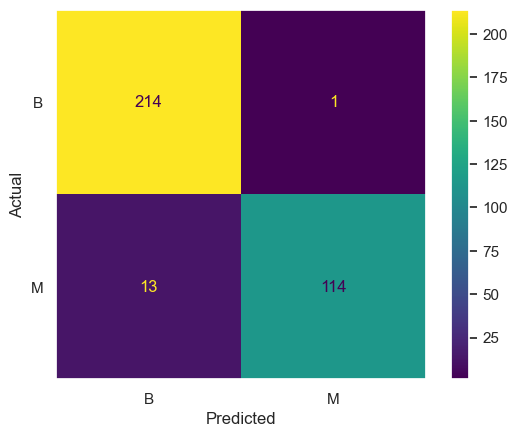

In [83]:
parameters = {'n_neighbors':[1, 5, 7, 11,13,15]} #set parameters for GridSearch
knn = KNeighborsClassifier() #create your SVM object
clf2 = GridSearchCV(knn, parameters) #create your GridSearch object (which will use your SVM object)
clf2.fit(X_train, y_train) #Fit the GridSearch object
print(clf2.best_estimator_) 
y_pred = clf2.predict(X_test) #Generate a prediction using the model found by GridSearch

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
cmd.ax_.grid(False)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

clf2.best_estimator_

DecisionTreeClassifier(max_depth=11)
0.9824561403508771
0.9824836807263486


DecisionTreeClassifier(max_depth=11)

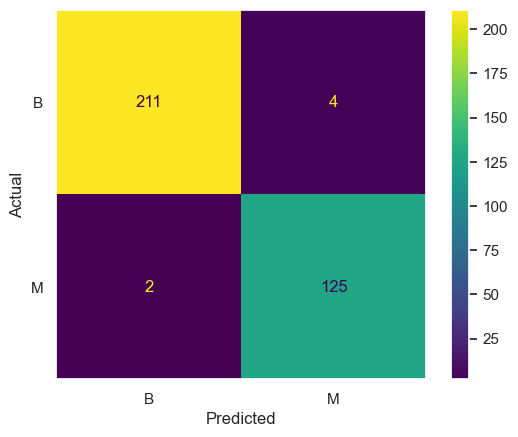

In [84]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':[1, 5, 7,11,13,15]} #set parameters for GridSearch
DT =  DecisionTreeClassifier() #create your SVM object
clf3 = GridSearchCV(DT, parameters) #create your GridSearch object (which will use your SVM object)
clf3.fit(X_train, y_train) #Fit the GridSearch object
print(clf3.best_estimator_) 
y_pred = clf3.predict(X_test) #Generate a prediction using the model found by GridSearch

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels= ['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
cmd.ax_.grid(False)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

clf3.best_estimator_

[[208   7]
 [ 22 105]]
0.9152046783625731
0.9139728719413439


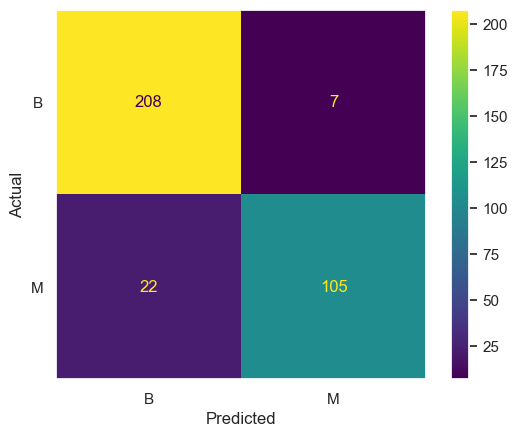

In [85]:
from sklearn.naive_bayes import GaussianNB
clf4 = GaussianNB()
clf4.fit(X_train, y_train) #Fit on the training set (need both data and labels)
y_pred =clf4.predict(X_test) #Predict on test set (no labels)

cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')
cmd.ax_.grid(False)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="weighted"))

In [86]:
from sklearn.ensemble import VotingClassifier
eclfH = VotingClassifier(estimators=[('svc', clf1),('knn', clf2), ('dt', clf3), ('gnb', clf4)],
                        voting='hard')

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)
eclf = eclfH.fit(X_train, y_train)

print("Accuracy Score")
print(clf1.score(X_train, y_train), "SVC")
print(clf2.score(X_train, y_train),"KNN")
print(clf3.score(X_train, y_train),"DT")
print(clf4.score(X_train, y_train),"GNB")
print(eclfH.score(X_train, y_train),"Voting")

Accuracy Score
0.9761306532663316 SVC
0.9748743718592965 KNN
1.0 DT
0.9309045226130653 GNB
0.9798994974874372 Voting


0.9532163742690059
0.9527893255244421


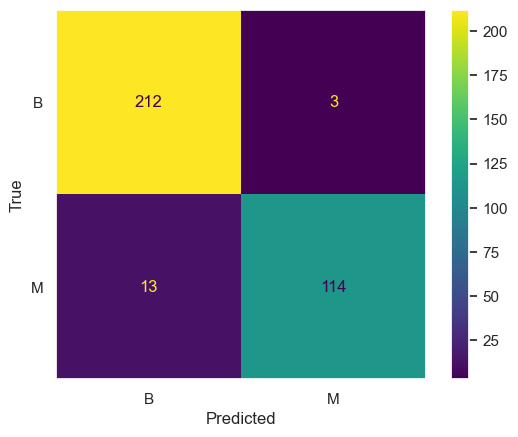

In [87]:
y_pred_ensembleH = eclfH.predict(X_test)
y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)
y_pred_3 = clf3.predict(X_test)
y_pred_4 = clf4.predict(X_test)

print(accuracy_score(y_test, y_pred_ensembleH))
print(f1_score(y_test, y_pred_ensembleH,average='weighted'))

cf_matrix = confusion_matrix(y_test, y_pred_ensembleH)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)

In [88]:
eclfS = VotingClassifier(estimators=[('svc', clf1),('knn', clf2), ('dt', clf3), ('gnb', clf4)],
                        voting='soft',weights=[1.5, 2, 2, .5])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)
eclf = eclfS.fit(X_train, y_train)

print("Accuracy Score")
print(clf1.score(X_train, y_train), "SVC")
print(clf2.score(X_train, y_train),"KNN")
print(clf3.score(X_train, y_train),"DT")
print(clf4.score(X_train, y_train),"GNB")
print(eclfS.score(X_train, y_train),"Voting")
#Give higher weights to KNN and DT because they perfrom better in Hard classifier

Accuracy Score
0.9761306532663316 SVC
0.9748743718592965 KNN
1.0 DT
0.9309045226130653 GNB
0.992462311557789 Voting


0.9707602339181286
0.9706610612552888


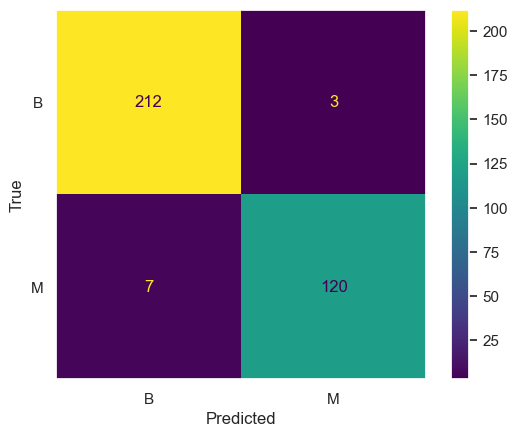

In [89]:
y_pred_ensembleS = eclfS.predict(X_test)
y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)
y_pred_3 = clf3.predict(X_test)
y_pred_4 = clf4.predict(X_test)

print(accuracy_score(y_test, y_pred_ensembleS))
print(f1_score(y_test, y_pred_ensembleS,average='weighted'))

cf_matrix = confusion_matrix(y_test, y_pred_ensembleS)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['B','M'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
cmd.ax_.grid(False)